##Parte 1

###Ejercicio 1

In [1]:
# Importamos los paquetes necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
pd.options.display.float_format = '{:,.2f}'.format




In [2]:
# Cargamos la base
df = pd.read_excel("eph_tp2.xlsx")
# Calculamos los adultos equivalentes por hogar
df['ad_equiv_hogar'] = df.groupby("CODUSU")["adulto_equiv"].transform("sum")

# Definimos la CBT por año
cbt = {2005: 205.07, 2025: 365177}
# Calculamos ingreso necesario por hogar
df['ingreso_necesario'] = df['ad_equiv_hogar'] * df['ANO4'].map(cbt)
# Creamos una columna que indique 1 si el individuo pertecene a un hogar pobre y 0 en caso contrario
df['pobre'] = (df['ITF'] < df['ingreso_necesario']).astype(int) # Primero nos devuelve true o false y lo convertimos a 1-0
# Reemplazamos la clasificación de pobre por nan para aquellas observaciones que tienen un ITF = 0
df.loc[df['ITF'] == 0, 'pobre'] = np.nan

In [3]:
# Creamos la variable de edad al cuadrado
df['edad2'] = df['CH06']**2

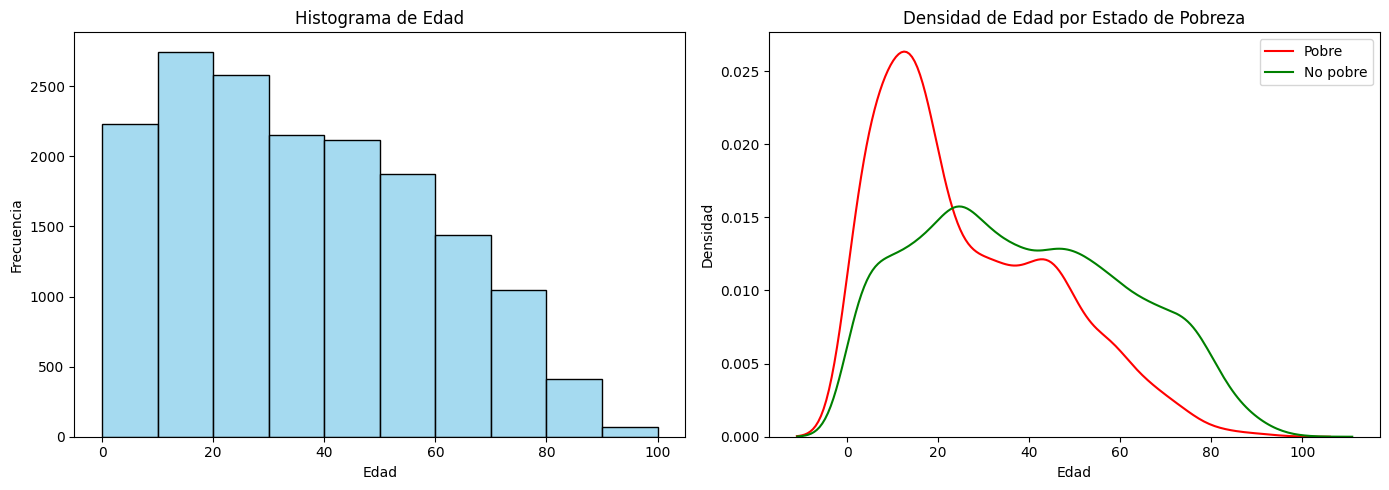

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 fila, 2 columnas

# Panel 1: Histograma de edad
sns.histplot(df['CH06'], bins=10, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Histograma de Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Panel 2: Kernel density por grupo pobre / no pobre
sns.kdeplot(df.loc[df['pobre'] == 1, 'CH06'], label='Pobre', color='red', ax=axes[1])
sns.kdeplot(df.loc[df['pobre'] == 0, 'CH06'], label='No pobre', color='green', ax=axes[1])
axes[1].set_title('Densidad de Edad por Estado de Pobreza')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Densidad')
axes[1].legend()

plt.tight_layout()
plt.show()

###Ejercicio 2

In [5]:
# Calculamos los años de educación
jardin = 2
primaria = 8 # Primaria Bsas (6+2)
egb = 11 # Jardin + 9 años egb (9+2)
secundaria = 14 # Jardin + primaria + secundaria 6 años
polimodal = 14 # Jardin + egb + polimodal 3 años
terciario = 17 # 14 de secundaria o polimodal + 3
universitario = 19 # 14 de secundaria o polimodal + 5
posgrado = 22 # 19 de universitario + 3 años
especial = 14


In [6]:
def calcular_educ(row):
    if row['CH12'] == 0 or row['CH12'] == 99: # No hay dato
        return np.nan
    elif row['CH13'] == 0 or row['CH13'] == 9 or row['CH13'] == 1: # Termino el nivel o no hay dato y asumimos que termino el nivel anterior
        if row['CH12'] == 1:
            return jardin
        elif row['CH12'] == 2:
            return primaria
        elif row['CH12'] == 3:
            return egb
        elif row['CH12'] == 4:
            return secundaria
        elif row['CH12'] == 5:
            return polimodal
        elif row['CH12'] == 6:
            return terciario
        elif row['CH12'] == 7:
            return universitario
        elif row['CH12'] == 8:
            return posgrado
        elif row['CH12'] == 9:
            return especial
    elif row['CH13'] == 2: # No Termino el nivel
        if ['CH14'] == 99 or row['CH14'] == 98:
            if row['CH12'] == 1:
                return jardin - 1
            elif row['CH12'] == 2:
                return primaria - 1
            elif row['CH12'] == 3:
                return egb - 1
            elif row['CH12'] == 4:
                return primaria - 1
            elif row['CH12'] == 5:
                return primaria - 1
            elif row['CH12'] == 6:
                return terciario - 1
            elif row['CH12'] == 7:
                return universitario - 1
            elif row['CH12'] == 8:
                return posgrado - 1
            elif row['CH12'] == 9:
                return especial - 1
        elif row['CH14'] == 0 or row['CH14'] == 1 or row['CH14'] == 2 or row['CH14'] == 3 or row['CH14'] == 4 or row['CH14'] == 5 or row['CH14'] == 6 or row['CH14'] == 7 or row['CH14'] == 8 or row['CH14'] == 9:
                if row['CH12'] == 1:
                    return row['CH14']
                elif row['CH12'] == 2:
                    return jardin + row['CH14']
                elif row['CH12'] == 3:
                    return jardin + row['CH14']
                elif row['CH12'] == 4:
                    return secundaria + row['CH14']
                elif row['CH12'] == 5:
                    return polimodal + row['CH14']
                elif row['CH12'] == 6:
                    return secundaria + row['CH14']
                elif row['CH12'] == 7:
                    return secundaria + row['CH14']
                elif row['CH12'] == 8:
                    return universitario + row['CH14']
                elif row['CH12'] == 9:
                    return row['CH14']

df['educ'] = df.apply(calcular_educ, axis=1)


In [7]:
df

,CODUSU,NRO_HOGAR,COMPONENTE,REGION,ANO4,CH04,CH06,CH07,CH08,CH12,...,P21,P47T,ITF,IPCF,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre,edad2,educ
0,125098,1,1,1,2005,1,80,4,1,4,...,0,583,583,583,0.74,0.74,151.75,0.00,6400,16.00
1,125188,1,1,1,2005,1,26,2,4,4,...,300,450,450,150,1.02,2.13,436.80,0.00,676,14.00
2,125188,1,2,1,2005,2,27,2,4,6,...,0,0,450,150,0.76,2.13,436.80,0.00,729,17.00
3,125188,1,3,1,2005,2,0,5,4,99,...,0,0,450,150,0.35,2.13,436.80,0.00,0,NaN
4,125242,1,1,1,2005,2,71,4,1,2,...,0,855,855,855,0.67,0.67,137.40,0.00,5041,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,TQRMNORWYHKMPRCDEIJAH00860437,1,1,1,2025,1,49,2,1,4,...,700000,700000,0,0,1.00,4.18,"1,526,439.86",NaN,2401,NaN
16661,TQRMNORWYHKMPRCDEIJAH00860437,1,2,1,2025,2,51,2,1,6,...,500000,500000,0,0,0.76,4.18,"1,526,439.86",NaN,2601,17.00
16662,TQRMNORWYHKMPRCDEIJAH00860437,1,3,1,2025,2,22,5,1,6,...,-9,-9,0,0,0.76,4.18,"1,526,439.86",NaN,484,17.00
16663,TQRMNORWYHKMPRCDEIJAH00860437,1,4,1,2025,1,26,5,1,4,...,0,0,0,0,1.02,4.18,"1,526,439.86",NaN,676,19.00


In [8]:
#presentamos una estadistica descriptiva para la variable educ
descriptive_stats = df['educ'].describe()
display(descriptive_stats)

,educ
count,"15,692.00"
mean,12.28
std,5.24
min,0.00
25%,8.00
50%,14.00
75%,17.00
max,24.00


**Comentarios sobre la variable 'educ'

La variable educ presenta una tendencia central en torno a la educación secundaria completa, con un alto nivel de dispersión y la existencia de personas que no han cursado educación formal así como otras que tienen estudios universitarios o de posgrado

###ejercicio 3

In [9]:
df_1=df.copy()

In [10]:
df_1['ITF_actualizado'] = np.where(
    df_1['ANO4'] == 2005,
    df_1['ITF'] *(165274.2/109.2),  # actualizar pesos (IPC2025,2004​/IPC2005,2004)	​
    df_1['ITF']  # si es 2025, dejar igual
)

# Actualizar la variable ingreso_total_familiar
df_1['ingreso_total_familiar'] = df_1['ITF_actualizado']

# Revisar resultado
print(df_1[['ANO4', 'ITF', 'ITF_actualizado', 'ingreso_total_familiar']].head())

   ANO4  ITF  ITF_actualizado  ingreso_total_familiar
0  2005  583       882,370.50              882,370.50
1  2005  450       681,075.00              681,075.00
2  2005  450       681,075.00              681,075.00
3  2005  450       681,075.00              681,075.00
4  2005  855     1,294,042.50            1,294,042.50


In [11]:
#actualizar los ingrasos necesarios para los del 2005 con los del 2025
df_1["ingreso_necesario_actualizado"]= np.where(df_1["ANO4"]==2005,
                                                df_1["ingreso_necesario"]/205.07*365177,
                                                df_1["ingreso_necesario"])

In [12]:
df_1['pobre_actualizado'] = (df_1['ITF_actualizado'] < df_1['ingreso_necesario_actualizado']).astype(int) # Primero nos devuelve true o false y lo convertimos a 1-0
# Reemplazamos la clasificación de pobre por nan para aquellas observaciones que tienen un ITF = 0
df_1.loc[df_1['ITF_actualizado'] == 0, 'pobre_actualizado'] = np.nan

In [13]:
df_1

,CODUSU,NRO_HOGAR,COMPONENTE,REGION,ANO4,CH04,CH06,CH07,CH08,CH12,...,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre,edad2,educ,ITF_actualizado,ingreso_total_familiar,ingreso_necesario_actualizado,pobre_actualizado
0,125098,1,1,1,2005,1,80,4,1,4,...,0.74,0.74,151.75,0.00,6400,16.00,"882,370.50","882,370.50","270,230.98",0.00
1,125188,1,1,1,2005,1,26,2,4,4,...,1.02,2.13,436.80,0.00,676,14.00,"681,075.00","681,075.00","777,827.01",1.00
2,125188,1,2,1,2005,2,27,2,4,6,...,0.76,2.13,436.80,0.00,729,17.00,"681,075.00","681,075.00","777,827.01",1.00
3,125188,1,3,1,2005,2,0,5,4,99,...,0.35,2.13,436.80,0.00,0,NaN,"681,075.00","681,075.00","777,827.01",1.00
4,125242,1,1,1,2005,2,71,4,1,2,...,0.67,0.67,137.40,0.00,5041,8.00,"1,294,042.50","1,294,042.50","244,668.59",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,TQRMNORWYHKMPRCDEIJAH00860437,1,1,1,2025,1,49,2,1,4,...,1.00,4.18,"1,526,439.86",NaN,2401,NaN,0.00,0.00,"1,526,439.86",NaN
16661,TQRMNORWYHKMPRCDEIJAH00860437,1,2,1,2025,2,51,2,1,6,...,0.76,4.18,"1,526,439.86",NaN,2601,17.00,0.00,0.00,"1,526,439.86",NaN
16662,TQRMNORWYHKMPRCDEIJAH00860437,1,3,1,2025,2,22,5,1,6,...,0.76,4.18,"1,526,439.86",NaN,484,17.00,0.00,0.00,"1,526,439.86",NaN
16663,TQRMNORWYHKMPRCDEIJAH00860437,1,4,1,2025,1,26,5,1,4,...,1.02,4.18,"1,526,439.86",NaN,676,19.00,0.00,0.00,"1,526,439.86",NaN


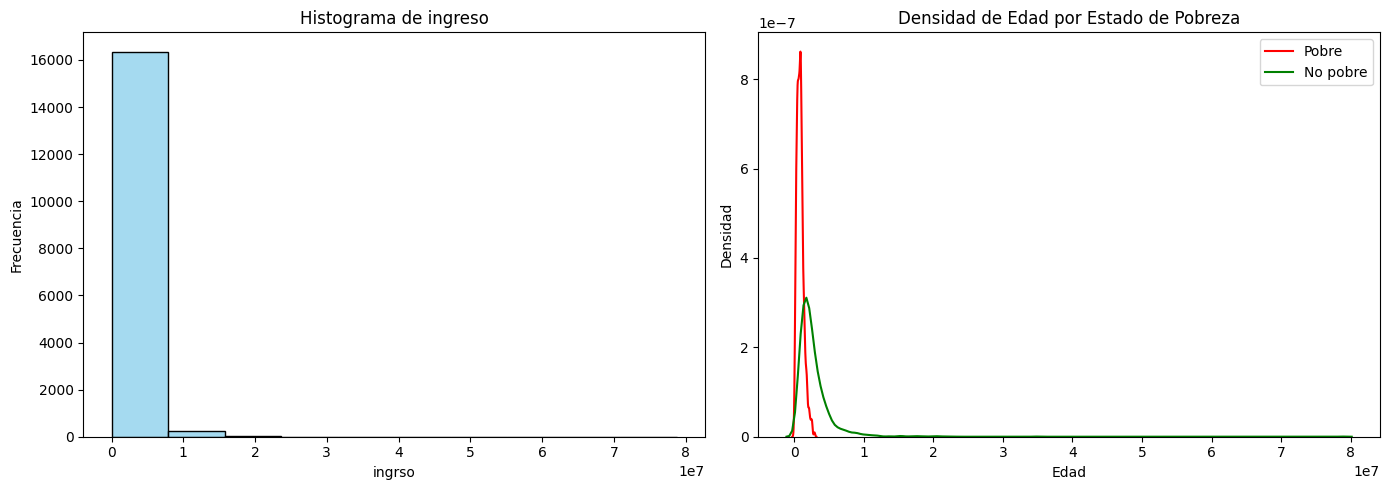

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 fila, 2 columnas

# Panel 1: Histograma de edad
sns.histplot(df_1['ingreso_total_familiar'], bins=10, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Histograma de ingreso')
axes[0].set_xlabel('ingrso')
axes[0].set_ylabel('Frecuencia')

# Panel 2: Kernel density por grupo pobre / no pobre
sns.kdeplot(df_1.loc[df_1['pobre_actualizado'] == 1, 'ingreso_total_familiar'], label='Pobre', color='red', ax=axes[1])
sns.kdeplot(df_1.loc[df_1['pobre_actualizado'] == 0, 'ingreso_total_familiar'], label='No pobre', color='green', ax=axes[1])
axes[1].set_title('Densidad de Edad por Estado de Pobreza')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Densidad')
axes[1].legend()

plt.tight_layout()
plt.show()

###ejercicio 4

In [15]:
df_2=df_1.copy()

In [16]:
df_2

,CODUSU,NRO_HOGAR,COMPONENTE,REGION,ANO4,CH04,CH06,CH07,CH08,CH12,...,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre,edad2,educ,ITF_actualizado,ingreso_total_familiar,ingreso_necesario_actualizado,pobre_actualizado
0,125098,1,1,1,2005,1,80,4,1,4,...,0.74,0.74,151.75,0.00,6400,16.00,"882,370.50","882,370.50","270,230.98",0.00
1,125188,1,1,1,2005,1,26,2,4,4,...,1.02,2.13,436.80,0.00,676,14.00,"681,075.00","681,075.00","777,827.01",1.00
2,125188,1,2,1,2005,2,27,2,4,6,...,0.76,2.13,436.80,0.00,729,17.00,"681,075.00","681,075.00","777,827.01",1.00
3,125188,1,3,1,2005,2,0,5,4,99,...,0.35,2.13,436.80,0.00,0,NaN,"681,075.00","681,075.00","777,827.01",1.00
4,125242,1,1,1,2005,2,71,4,1,2,...,0.67,0.67,137.40,0.00,5041,8.00,"1,294,042.50","1,294,042.50","244,668.59",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,TQRMNORWYHKMPRCDEIJAH00860437,1,1,1,2025,1,49,2,1,4,...,1.00,4.18,"1,526,439.86",NaN,2401,NaN,0.00,0.00,"1,526,439.86",NaN
16661,TQRMNORWYHKMPRCDEIJAH00860437,1,2,1,2025,2,51,2,1,6,...,0.76,4.18,"1,526,439.86",NaN,2601,17.00,0.00,0.00,"1,526,439.86",NaN
16662,TQRMNORWYHKMPRCDEIJAH00860437,1,3,1,2025,2,22,5,1,6,...,0.76,4.18,"1,526,439.86",NaN,484,17.00,0.00,0.00,"1,526,439.86",NaN
16663,TQRMNORWYHKMPRCDEIJAH00860437,1,4,1,2025,1,26,5,1,4,...,1.02,4.18,"1,526,439.86",NaN,676,19.00,0.00,0.00,"1,526,439.86",NaN


In [17]:
df_25 = pd.read_excel("usu_individual_T125.xlsx")
df_05 =pd.read_stata("usu_individual_T105.dta")

In [18]:
df_05_a = df_05.copy()
df_25_a = df_25.copy()

In [19]:
# Reemplazamos variables categroricas en texto por numero
df_05_a["region"] = df_05_a["region"].replace({"Gran Buenos Aires":1})

/tmp/ipython-input-459959944.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_05_a["region"] = df_05_a["region"].replace({"Gran Buenos Aires":1})


In [20]:
df_05_a .columns = df_05_a .columns.str.upper()

In [21]:
# Fitramos unicamente los datos para la región seleccionada
df_25_b= df_25_a[df_25_a["REGION"] == 1].copy()
df_05_b= df_05_a[df_05_a["REGION"] == 1].copy()

In [22]:
# Seleccionamos las 15 variables de interes
variables_de_interes = ['CODUSU','PP3E_TOT','PP3F_TOT']
df_25_c = df_25_b[variables_de_interes].copy()
df_05_c= df_05_b[variables_de_interes].copy()

In [23]:
# en este paso adjuntamos al final los datos de las dos base de datos
df_comp= pd.concat([df_05_c,df_25_c ])
print(df_comp.shape)


(16665, 3)


In [24]:
df_comp =df_comp.reset_index(drop=True)

In [25]:
df_comp

,CODUSU,PP3E_TOT,PP3F_TOT
0,125098,0.00,0.00
1,125188,20.00,0.00
2,125188,0.00,0.00
3,125188,0.00,0.00
4,125242,0.00,0.00
...,...,...,...
16660,TQRMNORWYHKMPRCDEIJAH00860437,50.00,0.00
16661,TQRMNORWYHKMPRCDEIJAH00860437,0.00,0.00
16662,TQRMNORWYHKMPRCDEIJAH00860437,0.00,0.00
16663,TQRMNORWYHKMPRCDEIJAH00860437,NaN,NaN


In [26]:
df_comp['horas_trabajadas'] =df_comp['PP3E_TOT'] + df_comp['PP3F_TOT']

In [27]:
df_2['horas_trabajadas'] = df_comp['horas_trabajadas'].values

In [28]:
df_2

,CODUSU,NRO_HOGAR,COMPONENTE,REGION,ANO4,CH04,CH06,CH07,CH08,CH12,...,ad_equiv_hogar,ingreso_necesario,pobre,edad2,educ,ITF_actualizado,ingreso_total_familiar,ingreso_necesario_actualizado,pobre_actualizado,horas_trabajadas
0,125098,1,1,1,2005,1,80,4,1,4,...,0.74,151.75,0.00,6400,16.00,"882,370.50","882,370.50","270,230.98",0.00,0.00
1,125188,1,1,1,2005,1,26,2,4,4,...,2.13,436.80,0.00,676,14.00,"681,075.00","681,075.00","777,827.01",1.00,20.00
2,125188,1,2,1,2005,2,27,2,4,6,...,2.13,436.80,0.00,729,17.00,"681,075.00","681,075.00","777,827.01",1.00,0.00
3,125188,1,3,1,2005,2,0,5,4,99,...,2.13,436.80,0.00,0,NaN,"681,075.00","681,075.00","777,827.01",1.00,0.00
4,125242,1,1,1,2005,2,71,4,1,2,...,0.67,137.40,0.00,5041,8.00,"1,294,042.50","1,294,042.50","244,668.59",0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,TQRMNORWYHKMPRCDEIJAH00860437,1,1,1,2025,1,49,2,1,4,...,4.18,"1,526,439.86",NaN,2401,NaN,0.00,0.00,"1,526,439.86",NaN,50.00
16661,TQRMNORWYHKMPRCDEIJAH00860437,1,2,1,2025,2,51,2,1,6,...,4.18,"1,526,439.86",NaN,2601,17.00,0.00,0.00,"1,526,439.86",NaN,0.00
16662,TQRMNORWYHKMPRCDEIJAH00860437,1,3,1,2025,2,22,5,1,6,...,4.18,"1,526,439.86",NaN,484,17.00,0.00,0.00,"1,526,439.86",NaN,0.00
16663,TQRMNORWYHKMPRCDEIJAH00860437,1,4,1,2025,1,26,5,1,4,...,4.18,"1,526,439.86",NaN,676,19.00,0.00,0.00,"1,526,439.86",NaN,NaN


In [29]:
df_2['horas_trabajadas'].describe()

,horas_trabajadas
count,"12,882.00"
mean,26.43
std,83.56
min,0.00
25%,0.00
50%,5.00
75%,40.00
max,"1,998.00"


### ejercicio 5 tabla de resumen


In [30]:
#calculamos el total de observaciones y el numero de observaciones para cada año
total_observations = len(df_2)
total_obs_2005 = len(df_2[df_2['ANO4'] == 2005])
total_obs_2025 = len(df_2[df_2['ANO4'] == 2025])

In [31]:
#calculamos el numero de valores fatantes en la columna pobre para todos los años
nan_pobre_total = df_2['pobre'].isnull().sum()
nan_pobre_2005 = df_2[df_2['ANO4'] == 2005]['pobre'].isnull().sum()
nan_pobre_2025 = df_2[df_2['ANO4'] == 2025]['pobre'].isnull().sum()

In [32]:
#calculamos pobres y no pobres
#'pobre' es 1 (pobre) y 'pobre' es 0 (no pobre)
poor_total = df_2['pobre'].sum()
non_poor_total = (df_2['pobre'] == 0).sum()
poor_2005 = df_2[df_2['ANO4'] == 2005]['pobre'].sum()
non_poor_2005 = (df_2[df_2['ANO4'] == 2005]['pobre'] == 0).sum()
poor_2025 = df_2[df_2['ANO4'] == 2025]['pobre'].sum()
non_poor_2025 = (df_2[df_2['ANO4'] == 2025]['pobre'] == 0).sum()

In [33]:
#contamos las variables limpias y homogeneizadas
cleaned_variables_count = 5

In [34]:
#creamos una tabla de resumen
summary_data = {
    2005: [int(total_obs_2005), int(nan_pobre_2005), int(poor_2005), int(non_poor_2005), int(cleaned_variables_count)],
    2025: [int(total_obs_2025), int(nan_pobre_2025), int(poor_2025), int(non_poor_2025), int(cleaned_variables_count)],
    'Total': [int(total_observations), int(nan_pobre_total), int(poor_total), int(non_poor_total), int(cleaned_variables_count)]
}
summary_table = pd.DataFrame(summary_data, index=["Cantidad observaciones", "Cantidad de observaciones con NAs en la variable “Pobre”", "Cantidad de Pobres", "Cantidad de No Pobres", "Cantidad de variables limpias y homogeneizadas"])
display(summary_table)

,2005,2025,Total
Cantidad observaciones,9484,7181,16665
Cantidad de observaciones con NAs en la variable “Pobre”,113,2872,2985
Cantidad de Pobres,2532,1341,3873
Cantidad de No Pobres,6839,2968,9807
Cantidad de variables limpias y homogeneizadas,5,5,5


# Parte 2: métodos no suoervisados

#

In [45]:
#primero agregamos la variable miembros en el hogar

In [35]:
colu = df_2.columns
colu

Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'REGION', 'ANO4', 'CH04', 'CH06',
       'CH07', 'CH08', 'CH12', 'CH13', 'CH14', 'NIVEL_ED', 'ESTADO',
       'CAT_INAC', 'PP10A', 'PP03J', 'PP04A', 'P21', 'P47T', 'ITF', 'IPCF',
       'adulto_equiv', 'ad_equiv_hogar', 'ingreso_necesario', 'pobre', 'edad2',
       'educ', 'ITF_actualizado', 'ingreso_total_familiar',
       'ingreso_necesario_actualizado', 'pobre_actualizado',
       'horas_trabajadas'],
      dtype='object')

In [36]:
df_2

,CODUSU,NRO_HOGAR,COMPONENTE,REGION,ANO4,CH04,CH06,CH07,CH08,CH12,...,ad_equiv_hogar,ingreso_necesario,pobre,edad2,educ,ITF_actualizado,ingreso_total_familiar,ingreso_necesario_actualizado,pobre_actualizado,horas_trabajadas
0,125098,1,1,1,2005,1,80,4,1,4,...,0.74,151.75,0.00,6400,16.00,"882,370.50","882,370.50","270,230.98",0.00,0.00
1,125188,1,1,1,2005,1,26,2,4,4,...,2.13,436.80,0.00,676,14.00,"681,075.00","681,075.00","777,827.01",1.00,20.00
2,125188,1,2,1,2005,2,27,2,4,6,...,2.13,436.80,0.00,729,17.00,"681,075.00","681,075.00","777,827.01",1.00,0.00
3,125188,1,3,1,2005,2,0,5,4,99,...,2.13,436.80,0.00,0,NaN,"681,075.00","681,075.00","777,827.01",1.00,0.00
4,125242,1,1,1,2005,2,71,4,1,2,...,0.67,137.40,0.00,5041,8.00,"1,294,042.50","1,294,042.50","244,668.59",0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,TQRMNORWYHKMPRCDEIJAH00860437,1,1,1,2025,1,49,2,1,4,...,4.18,"1,526,439.86",NaN,2401,NaN,0.00,0.00,"1,526,439.86",NaN,50.00
16661,TQRMNORWYHKMPRCDEIJAH00860437,1,2,1,2025,2,51,2,1,6,...,4.18,"1,526,439.86",NaN,2601,17.00,0.00,0.00,"1,526,439.86",NaN,0.00
16662,TQRMNORWYHKMPRCDEIJAH00860437,1,3,1,2025,2,22,5,1,6,...,4.18,"1,526,439.86",NaN,484,17.00,0.00,0.00,"1,526,439.86",NaN,0.00
16663,TQRMNORWYHKMPRCDEIJAH00860437,1,4,1,2025,1,26,5,1,4,...,4.18,"1,526,439.86",NaN,676,19.00,0.00,0.00,"1,526,439.86",NaN,NaN


In [46]:
# Creamos la variable que totaliza los miembros del hogar
df_2['cant_miembros'] = df_2.groupby('CODUSU')['CODUSU'].transform('size')

# Selecciono las variables
variables_corr = ['CH06', 'edad2', 'educ', 'ingreso_total_familiar', 'cant_miembros', 'horas_trabajadas']

# Calculo la matriz de correlaciones
correlation_matrix = df_2[variables_corr].corr()
display(correlation_matrix)

,CH06,edad2,educ,ingreso_total_familiar,cant_miembros,horas_trabajadas
CH06,1.00,0.96,0.20,-0.03,-0.43,0.07
edad2,0.96,1.00,0.07,-0.05,-0.42,0.02
educ,0.20,0.07,1.00,0.10,-0.20,0.11
ingreso_total_familiar,-0.03,-0.05,0.10,1.00,0.05,-0.00
cant_miembros,-0.43,-0.42,-0.20,0.05,1.00,-0.03
horas_trabajadas,0.07,0.02,0.11,-0.00,-0.03,1.00


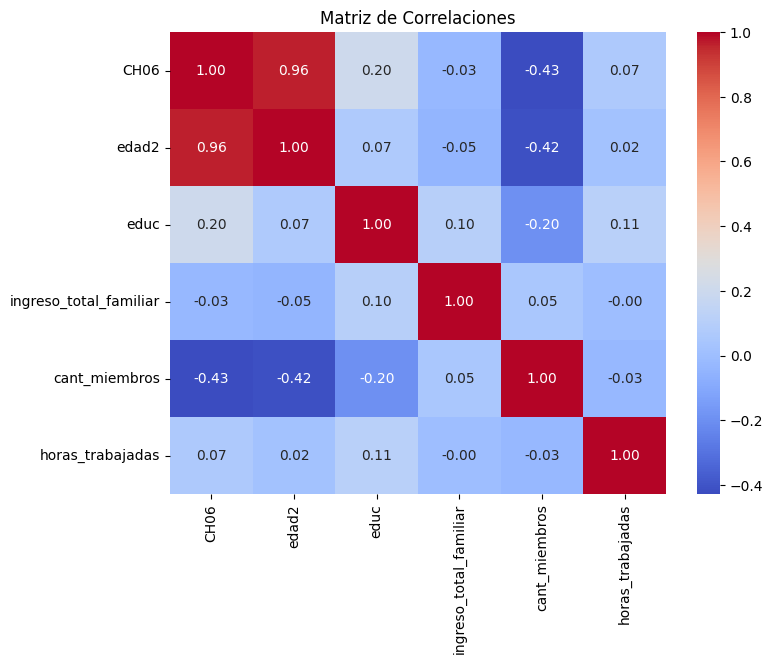

In [47]:
#graficamos la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones')
plt.show()

## PCA

### ejercicio 2

In [48]:
#selecciono las variables para el analisis de componentes principales
df_pca_prep = df_2[['CH06', 'edad2', 'educ', 'ingreso_total_familiar', 'cant_miembros', 'horas_trabajadas']].copy()
df_pca_prep.dropna(inplace=True)

In [49]:
#estandarizo las variables para que tengan media cero y desvio estandar 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df_pca_prep)
df_scaled = pd.DataFrame(df_scaled_array, columns=df_pca_prep.columns)

In [50]:
#realizamos el analisis de componentes principales
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit_transform(df_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("varianza explicada de cada componente principal:")
print(explained_variance_ratio)
print("\varianza explicada acumulada:")
print(cumulative_explained_variance)

varianza explicada de cada componente principal:
[0.37856216 0.19368431 0.16685768 0.14709497 0.10974492 0.00405596]
arianza explicada acumulada:
[0.37856216 0.57224647 0.73910414 0.88619912 0.99594404 1.        ]


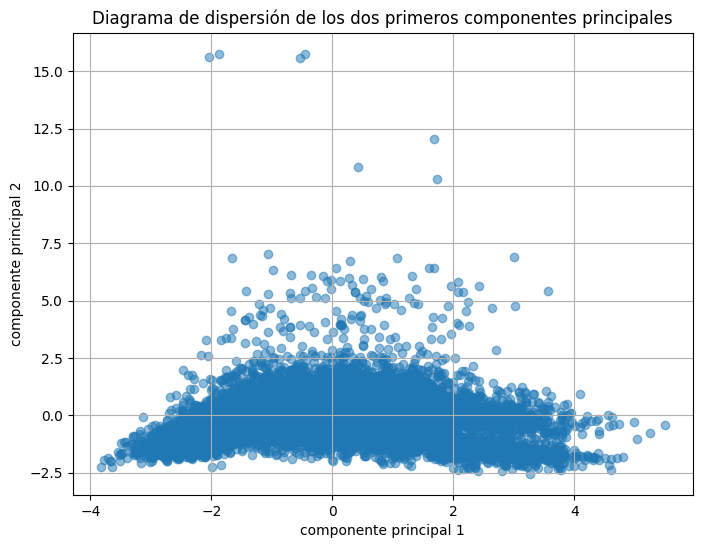

In [51]:
# creamos un dataframe y dibujamos el diagrama de dispersion de los dos primeros componentes principales
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('Diagrama de dispersión de los dos primeros componentes principales')
plt.xlabel('componente principal 1')
plt.ylabel('componente principal 2')
plt.grid(True)
plt.show()

### Ejercicio 3

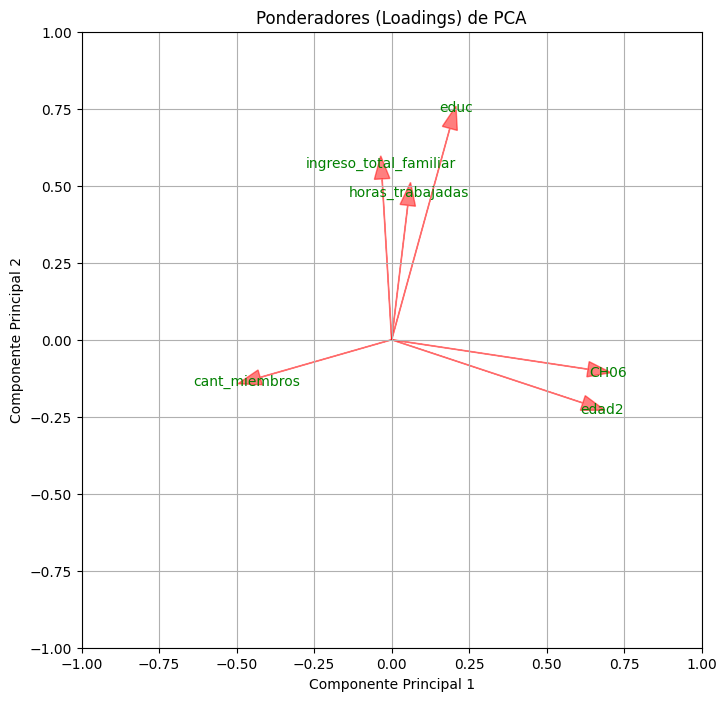

In [52]:
# cargo los 2 primeros componentes
loadings = pca.components_.T[:, :2]


variables = df_scaled.columns

# Creamos un diagrama de dispersion
plt.figure(figsize=(8, 8))
for i, var in enumerate(variables):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, var, color='g', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Ponderadores (Loadings) de PCA')
plt.grid()
plt.show()

### Ejercicio 4

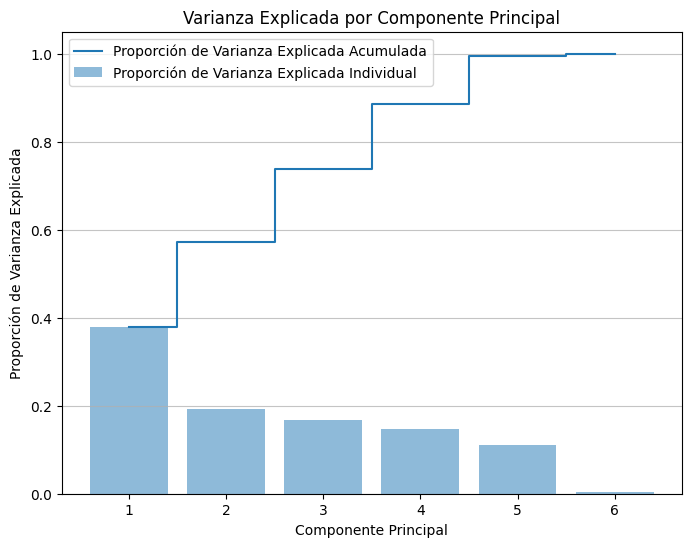

In [53]:
# graficamos la proporcion de varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Proporción de Varianza Explicada Individual')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Proporción de Varianza Explicada Acumulada')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.title('Varianza Explicada por Componente Principal')
plt.legend(loc='best')
plt.grid(axis='y', alpha=0.75)
plt.show()

### *Cluster*

### Ejercicio 5: cluster k-medias

In [63]:
#Seleccionamos las columnas relevantes para la agrupar yrevisamos  los valores faltantes
df_clustering = df_2[['CH06', 'ingreso_total_familiar']].copy()
df_clustering.dropna(inplace=True)
display(df_clustering.head())
print(df_clustering.shape)

,CH06,ingreso_total_familiar
0,80,"882,370.50"
1,26,"681,075.00"
2,27,"681,075.00"
3,0,"681,075.00"
4,71,"1,294,042.50"


(16665, 2)


In [64]:
#Aplicamos el algoritmo de k-medias con k = 2, k = 4 y k = 10 utilizando n_init = 20.
from sklearn.cluster import KMeans

k_values = [2, 4, 10]
kmeans_models = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(df_clustering)
    kmeans_models[k] = kmeans

In [57]:
#Añadimos las etiquetas de clúster obtenidas mediante el algoritmo K-medias
for k, model in kmeans_models.items():
    df_clustering[f'cluster_label_k{k}'] = model.predict(df_clustering[['CH06', 'ingreso_total_familiar']])

display(df_clustering.head())

,CH06,ingreso_total_familiar,cluster_label_k2,cluster_label_k4,cluster_label_k10
0,80,"882,370.50",0,0,0
1,26,"681,075.00",0,0,0
2,27,"681,075.00",0,0,0
3,0,"681,075.00",0,0,0
4,71,"1,294,042.50",0,0,0


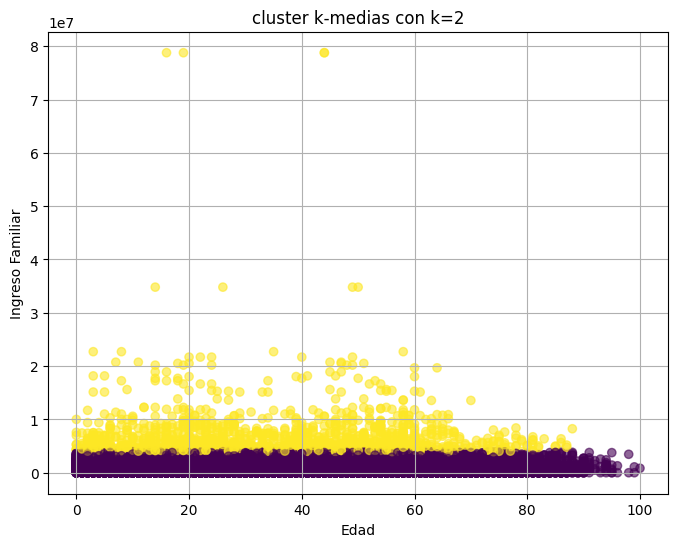

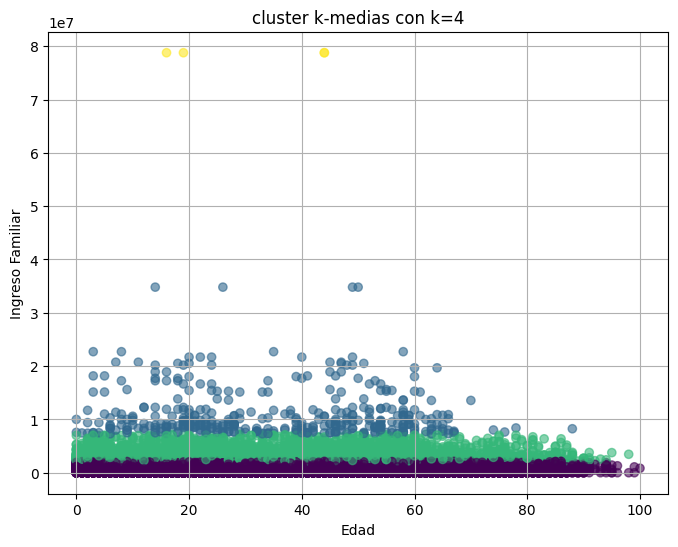

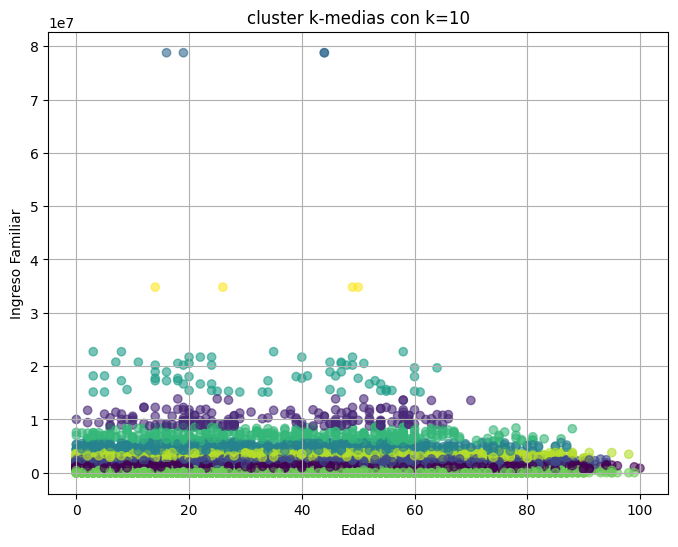

In [68]:
#Generamos los diagramas de dispersión de edad vs. ingreso familiar para cada valor de k
for k, model in kmeans_models.items():
# agregamos las etiquetas del clúster a df_clustering después de eliminar los NaN
    df_clustering[f'cluster_label_k{k}'] = model.predict(df_clustering[['CH06', 'ingreso_total_familiar']])

    plt.figure(figsize=(8, 6))
    plt.scatter(df_clustering['CH06'], df_clustering['ingreso_total_familiar'], c=df_clustering[f'cluster_label_k{k}'], cmap='viridis', alpha=0.6)
    plt.title(f'cluster k-medias con k={k}')
    plt.xlabel('Edad')
    plt.ylabel('Ingreso Familiar')
    plt.grid(True)
    plt.show()

In [69]:

#Calcular la inercia (suma de cuadrados dentro del grupo) para k de 1 a 10.
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(df_clustering)
    inertia_values.append(kmeans.inertia_)

print(inertia_values)

[9.922763621417042e+16, 5.6720463474375576e+16, 3.5073762693471184e+16, 1.90877203038113e+16, 1.1426486963151086e+16, 7171235961693624.0, 5255878542881266.0, 4068801195206648.0, 3031655686757770.5, 2299121392833188.5]


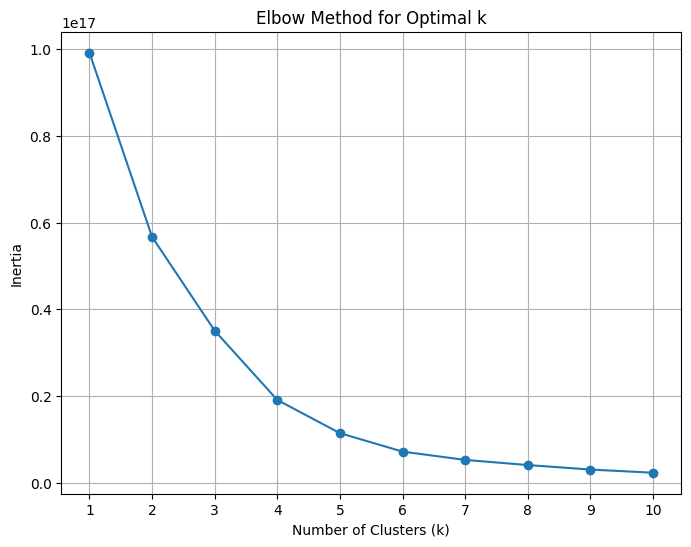

In [70]:
#Representamos graficamente utilizando el metodo elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()